# Using Pandas method chaining to improve code readability

This is a notebook for the medium article [Using Pandas method chaining to improve code readability](https://medium.com/@bindiatwork/using-pandas-method-chaining-to-improve-code-readability-d8517c5626ac)

Please check out article for instructions

**License**: [BSD 2-Clause](https://opensource.org/licenses/BSD-2-Clause)

In [1]:
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

df = pd.read_csv('data/train.csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

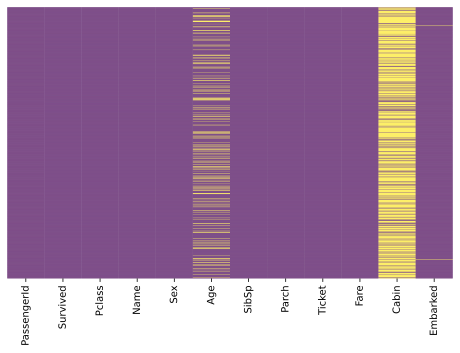

In [2]:
plt.subplots(figsize=(8,5))
sns.heatmap(df.isnull(), 
            yticklabels=False, 
            cbar=False, 
            cmap='viridis')

## Task 

Suppose we have been asked to take a look at passengers departed from Southampton, and calculate the survival rate for different age groups and Pclass.
1. Data cleaning: replace the missing Age with some form of imputation
2. Select passengers departed from Southampton
3. Convert ages to groups of age ranges: ≤12, Teen (≤ 18), Adult (≤ 60) and Older (>60)
4. Create a pivot table to display the survival rate for different age groups and Pclass
5. Improve the display of pivot table by renaming axis labels and formatting value.

### 1. Data cleaning: replace the missing Age with some form of imputation

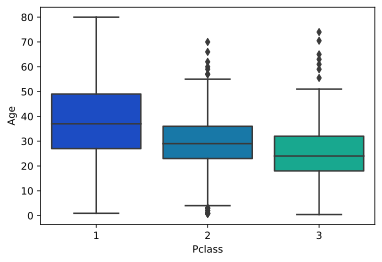

In [3]:
sns.boxplot(x='Pclass',
            y='Age',
            data=df,
            palette='winter')

In [4]:
pclass_age_map = {
  1: 37,
  2: 29,
  3: 24,
}
def replace_age_na(x_df, fill_map):
    cond=x_df['Age'].isna()
    res=x_df.loc[cond,'Pclass'].map(fill_map)
    x_df.loc[cond,'Age']=res
    return x_df

In [5]:
res = (
  pd.read_csv('data/train.csv')
    .pipe(replace_age_na, pclass_age_map)
)

res.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

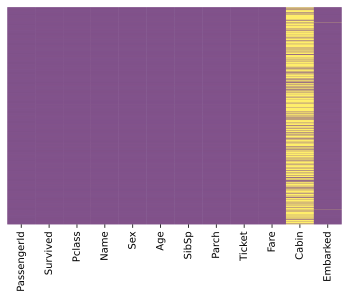

In [6]:
sns.heatmap(res.isnull(), 
            yticklabels=False, 
            cbar=False, 
            cmap='viridis')

### 2. Select passengers departed from Southampton

In [7]:
res = (
  pd.read_csv('data/train.csv')
    .pipe(replace_age_na, pclass_age_map)
    .query('Embarked == "S"')
)

res.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
6            7         0       1   

                                           Name     Sex   Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris    male  22.0      1      0   
2                        Heikkinen, Miss. Laina  female  26.0      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0   
4                      Allen, Mr. William Henry    male  35.0      0      0   
6                       McCarthy, Mr. Timothy J    male  54.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  
6             17463  51.8625   E46        S

In [8]:
res.Embarked.value_counts()

S    644
Name: Embarked, dtype: int64

### 3. Convert ages to groups of age ranges: ≤12, Teen (≤ 18), Adult (≤ 60) and Older (>60)

In [9]:
bins=[0, 13, 19, 61, sys.maxsize]
labels=['<12', 'Teen', 'Adult', 'Older']

res = (
  pd.read_csv('data/train.csv')
    .pipe(replace_age_na, pclass_age_map)
    .query('Embarked == "S"')
    .assign(ageGroup = lambda df: pd.cut(df['Age'], bins=bins, labels=labels))
)

res.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
6            7         0       1   

                                           Name     Sex   Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris    male  22.0      1      0   
2                        Heikkinen, Miss. Laina  female  26.0      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0   
4                      Allen, Mr. William Henry    male  35.0      0      0   
6                       McCarthy, Mr. Timothy J    male  54.0      0      0   

             Ticket     Fare Cabin Embarked ageGroup  
0         A/5 21171   7.2500   NaN        S    Adult  
2  STON/O2. 3101282   7.9250   NaN        S    Adult  
3            113803  53.1000  C123        S    Adult  
4            373450   8.0500   NaN        S    Adult  
6             17463  51.8625   E46        S    Adult

### 4. Create a pivot table to display the survival rate for different age groups and Pclass

In [10]:
bins=[0, 13, 19, 61, sys.maxsize]
labels=['<12', 'Teen', 'Adult', 'Older']

(
  pd.read_csv('data/train.csv')
    .pipe(replace_age_na, pclass_age_map)
    .query('Embarked == "S"')
    .assign(ageGroup = lambda df: pd.cut(df['Age'], bins=bins, labels=labels))
    .pivot_table(
        values='Survived', 
        columns='Pclass', 
        index='ageGroup', 
        aggfunc='mean')
)

Pclass           1         2         3
ageGroup                              
<12       0.750000  1.000000  0.371429
Teen      0.800000  0.400000  0.177778
Adult     0.580952  0.407692  0.166052
Older     0.250000  0.333333  0.500000

### 5. Improve the display of pivot table by renaming axis labels and formatting values.

In [11]:
bins=[0, 13, 19, 61, sys.maxsize]
labels=['<12', 'Teen', 'Adult', 'Older']

(
  pd.read_csv('data/train.csv')
    .pipe(replace_age_na, pclass_age_map)
    .query('Embarked == "S"')
    .assign(ageGroup = lambda df: pd.cut(df['Age'], bins=bins, labels=labels))
    .pivot_table(
        values='Survived', 
        columns='Pclass', 
        index='ageGroup', 
        aggfunc='mean')
    .rename_axis('', axis='columns')
    .rename('Class {}'.format, axis='columns')
    .style.format('{:.2%}')
)

This is a notebook for the medium article [Using Pandas method chaining to improve code readability](https://medium.com/@bindiatwork/using-pandas-method-chaining-to-improve-code-readability-d8517c5626ac)

Please check out article for instructions